# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [2]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [6]:
data = pd.read_csv('/Users/ekaterina.dorokhova/Desktop/Математика для ML/ДЗ 1/Zadanie/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

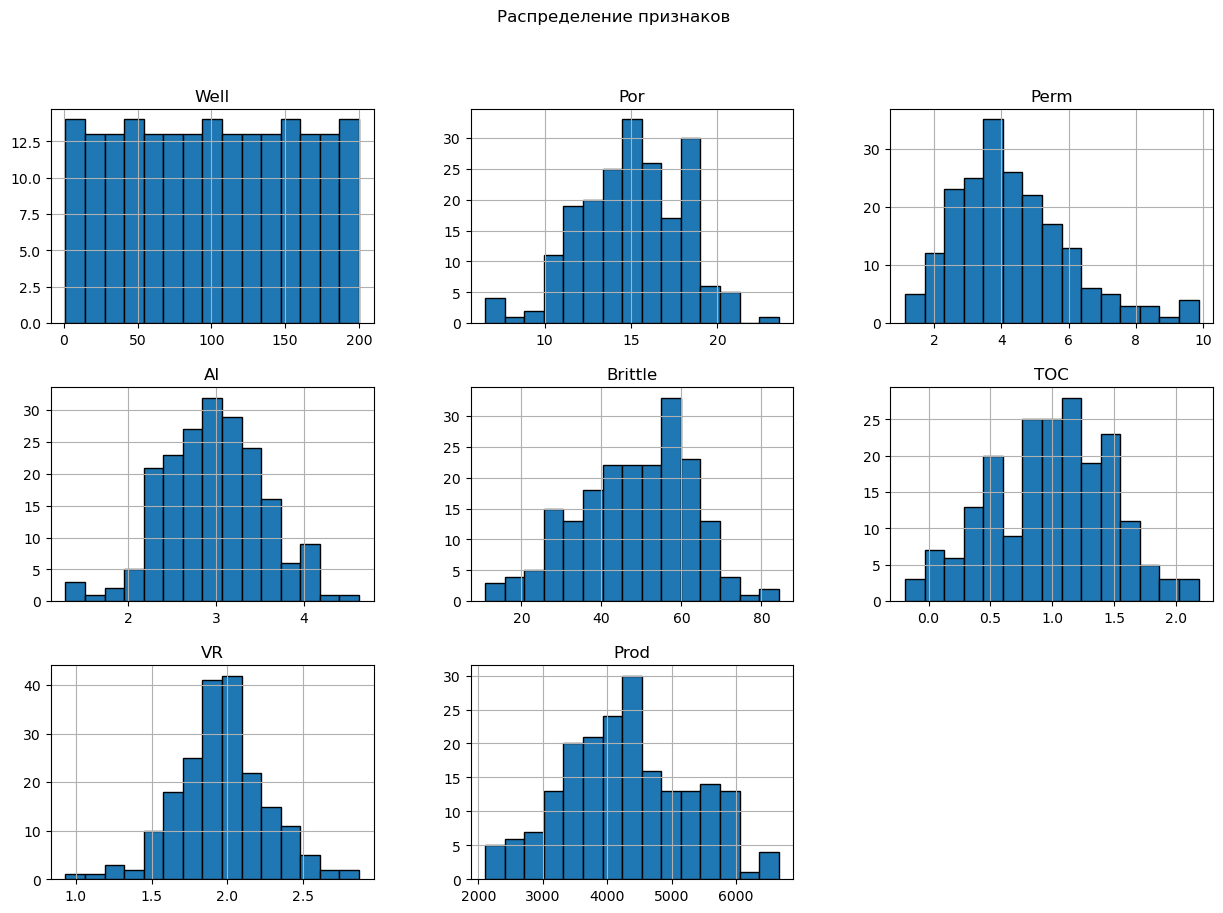

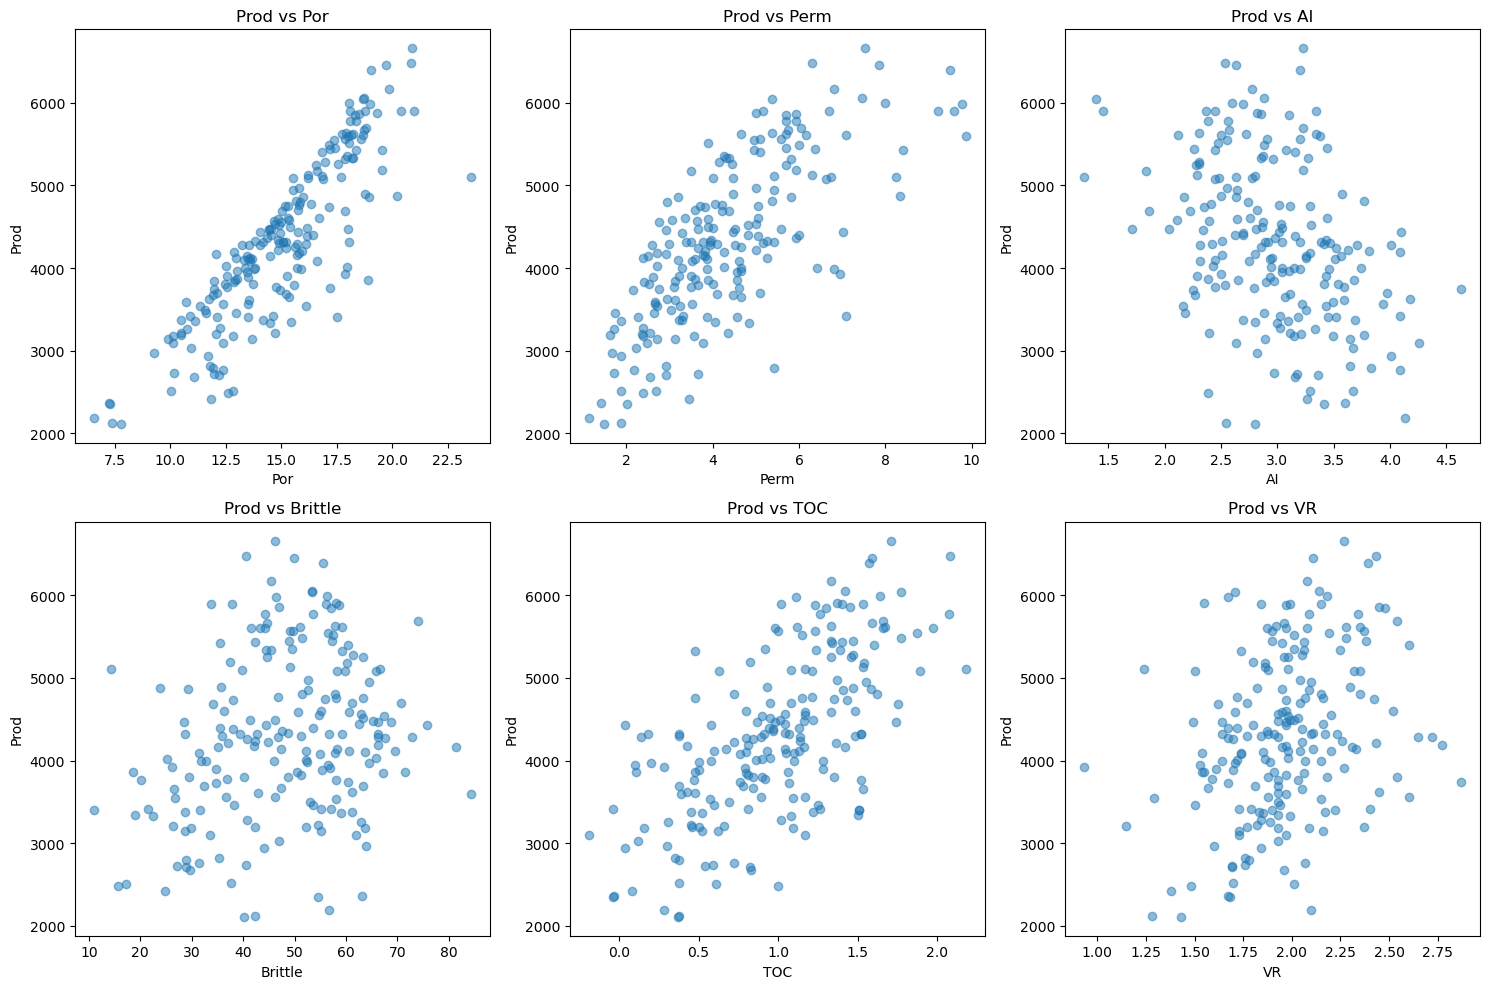

In [20]:
# Ваш код здесь
# Визуализация признаков для оценки
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Распределение признаков")
plt.show()

# Диаграммы рассеяния для целевого признака Prod и остальных признаков
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(data[feature], data['Prod'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Prod')
    plt.title(f'Prod vs {feature}')
plt.tight_layout()
plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

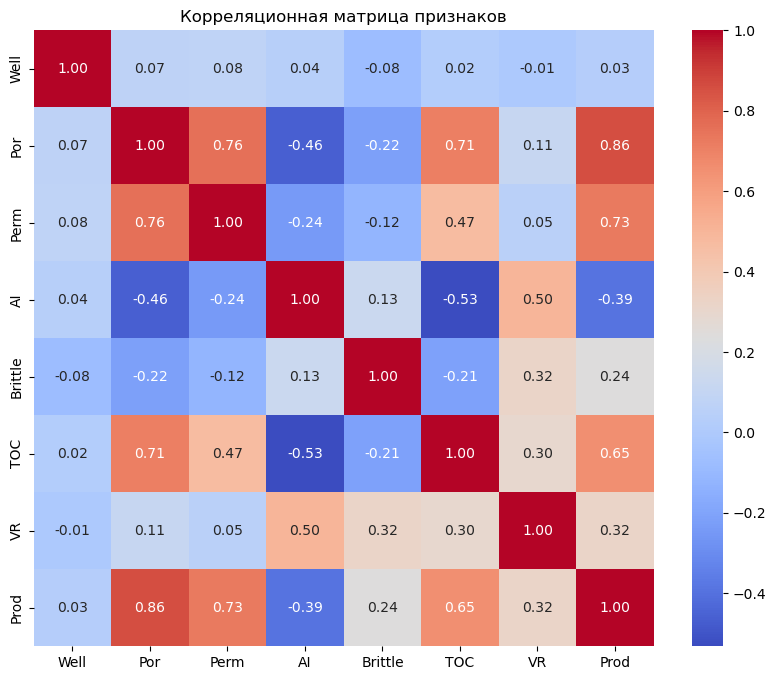

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652095


In [18]:
# Ваш код здесь
# Корреляционная матрица
correlation_matrix = data.corr()

# Её визуализация - тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

# Ранг матрицы
rank = np.linalg.matrix_rank(correlation_matrix)

# Определитель матрицы
determinant = np.linalg.det(correlation_matrix)

print("Ранг корреляционной матрицы:", rank)
print("Определитель корреляционной матрицы:", determinant)

> *Ваши выводы здесь*
> 
Корреляция признаков с целевым признаком Prod:
Por (Пористость): Корреляция 0.86 — сильная положительная корреляция говорит о том, что пористость сильно влияет на добычу газа. И диаграмма рассеяния так же показывает выраженную положительную линейную зависимость между Por и Prod. Т.е., вероятно, Por - это один из основных предикторов Prod.
Perm (Проницаемость): Корреляция 0.73 — высокая положительная корреляция - проницаемость влияние на добычу (так же наблюдается и на диаграмме рассеяния).
TOC (Общий органический углерод): Корреляция 0.65 — невысокая положительная корреляция. ТОС связан с добычей, но влияет на неё не сильно.
AI (Акустический импеданс): Корреляция -0.39 — отрицательная корреляция, т.е. чем выше акустический импеданс, тем ниже добыча газа. На диаграмме рассеяния точки распределены относительно равномерно, что готоворит об отсутствии (или слабой) линейной связи.
Brittle (корреляция 0.24) и VR (0.32) - слабая корреляцию с Prod, т.е. признаки не имеют высокого значения для предсказания добычи газа.

Корреляции между признаками:
Por и Perm: Корреляция 0.76 — высокая положительная корреляция, т.е. пористость и проницаемость связаны между собой, что может говорить о мультиколлинеарности.
Por и TOC: Корреляция 0.71 — высокая положительная корреляция, т.е. возможна взаимосвязь между пористостью и содержанием органического углерода.
AI и TOC: Корреляция -0.53 — средняя отрицательная корреляция говорит о связи между акустическим импедансом и содержанием органического углерода. Повышение одного признака ведёт к снижению другого.

Предикторы целевого показателя: значимыми признаками для предсказания целевого показателя, добычи газа (Prod), являются пористость (Por), проницаемость (Perm) и общий органический углерод (TOC). Эти признаки имеют сильную корреляцию с признаком Prod, поэтому нужно их включить в модель.
Высокая корреляция между признаками Por, Perm, и TOC может быть признаком мультиколлинеарности, что может негативно повлиять на качество модели, и в модели нужно предусмотреть методы борьбы с мультиколлинеарностью.
Незначимые признаки: признаки Brittle и VR имеют слабую корреляцию с Prod, поэтому, вероятно, они не окажутся важными для предсказания целевой переменной и их включение существенно не улучшит качество модели.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [32]:
# Ваш код здесь
# Матрица наблюдений X
X = data.drop(columns=['Prod']).values

# Вектор правильных ответов y
y = data['Prod'].values

# Единичный столбец в X для учета интерсепта
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Коэффициенты (с помощью матричной формулы МНК)
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Округление коэффициентов
beta_rounded = np.round(beta)

# Названия признаков (фич)
feature_names = ['Intercept'] + list(data.drop(columns=['Prod']).columns)

# Вывод коэффициентов
print("Коэффициенты модели:", beta_rounded)
print(f"{feature_names[0]}: {beta_rounded[0]}")
print(f"{feature_names[1]}: {beta_rounded[1]}")
print(f"{feature_names[2]}: {beta_rounded[2]}")
print(f"{feature_names[3]}: {beta_rounded[3]}")
print(f"{feature_names[4]}: {beta_rounded[4]}")
print(f"{feature_names[5]}: {beta_rounded[5]}")
print(f"{feature_names[6]}: {beta_rounded[6]}")
print(f"{feature_names[7]}: {beta_rounded[7]}")

Коэффициенты модели: [-1232.     0.   230.   116.  -365.    25.   -78.   785.]
Intercept: -1232.0
Well: 0.0
Por: 230.0
Perm: 116.0
AI: -365.0
Brittle: 25.0
TOC: -78.0
VR: 785.0


> *Ваши выводы здесь*
>
Значение коэффициента показывает то, насколько целевая переменная Prod меняется при увеличении признака, которому этот коэффециент соответствует. Если какой-то из коэффициентов близок к нулю, то этот признак не оказывает существенного влияния на целевую переменную Prod, т.е. не является информативным для модели. Наиболее информативными являются признаки с наибольшими коэффициентами.
Таким образом, мы видим, что 
- коэффициент Por (Пористость) равен 0.0, т.е. в модели пористость не влияет на добычу газа (при увеличении Por добыча газа не изменится). Хотя прежде мы видели сильную положительную корреляцию Por с целевым показателем. Возможно, его влияние в модели нивелируется из-за высокой корреляции и мультиколлинеарности с признаком Perm.
- коэффициент Perm (Проницаемость) положительный и равен 230. Это показывает, что увеличение проницаемости на одну единицу приводит к увеличению добычи газа на 230 единиц в сутки.
- коэффициент AI (Акустический импеданс) - положительный и равен 116.0 - увеличение акустического импеданса на одну единицу увеличивает добычу газа на 116 дениц в сутки.
- отрицательный коэффициент Brittle (Коэффициент хрупкости) = -365.0 - увеличение хрупкости снижает добычу газа.
- коэффициент TOC (Общий органический углерод) = 25.0 - увеличение органического углерода незначительно увеличивает добычу газа.
- отрицательный коэффициент VR (Коэффициент отражения витринита) = -78.0 - увеличение коэффициента отражения витринита незначительно снижает добычу газа.
- коэффициент Well (Номер скважины) = 785.0. Хотя коэффициент высокий, но это номер скважины - он не может влиять добычу газа. Высокий показатель коэффициента может быть связан с особой логикой нумерации скважин, например, с учётом их эффективности. Этот признак лучше исключить, так как он будет добавлять шум в модель.
- Intercept (свободный член) равен -1232.0. Это базовое значение предсказания, которое нужно для корректировки модели (технический признак). Без влияния других признаков (если бы они были равны 0), то модель бы предсказывала -1232 единиц добычи газа в сутки.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [37]:
# Ваш код здесь

# А) Прогноз выработки газа для скважины с заданными параметрами
well_params = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}

# Вектор признаков
X_new = np.array([1, well_params['Por'], well_params['Perm'], well_params['AI'], 
                  well_params['Brittle'], well_params['TOC'], well_params['VR'], well_params['Well']])

# Прогноз выработки газа для скважины (произведение векторов заданных признаков на коэффициенты)
predicted_prod = X_new @ beta

# Абсолютная ошибка прогноза, если на скважине прозводится 4748.315024 млн.куб.фут.газа/день
actual_prod = 4748.315024
absolute_error = abs(predicted_prod - actual_prod)

print("Прогноз выработки газа для скважины:", predicted_prod)
print("Абсолютная ошибка прогноза:", absolute_error)

# Б) Прогноз выработки газа для всех скважин из обучающего набора данных
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Прогнозы для всех скважин
predicted_prod_all = X @ beta

# Средняя абсолютная ошибка (MAE)
mae = mean_absolute_error(y, predicted_prod_all)

# Среднеквадратичная ошибка (MSE)
mse = mean_squared_error(y, predicted_prod_all)

print("Средняя абсолютная ошибка (MAE):", mae)
print("Среднеквадратичная ошибка (MSE):", mse)

Прогноз выработки газа для скважины: 62638.73531444292
Абсолютная ошибка прогноза: 57890.42029044292
Средняя абсолютная ошибка (MAE): 153.62297086555168
Среднеквадратичная ошибка (MSE): 39315.040140266385


> *Ваши выводы здесь*

А) Прогноз для одной скважины:
Прогноз выработки газа для скважины с заданными параметрами составил 6238.735 млн куб. футов в день, а абсолютная ошибка прогноза 1490.42 млн куб. футов в день, и это высокий показатель ошибки. Это может указывать на то, что скважина имеет необычные параметры, которые отличают её от других скважин, поэтому модель её описывает не достаточно корректно.

Б) Прогноз выработки газа для всех скважин из обучающего набора данных:
На остальном наборе данных модель показывает большую точность и лучше их описывает и предсказывает, чем описанную выше скважину.
В среднем, мы получили абсолютную ошибку (MAE) 153.62 млн куб. футов в день, что является почти в 10 раз более низкой ошибкой, чем на скважине, описанной выше. Среднеквадратичная ошибка (MSE) равна 39315.04 млн куб. фут./день в квадрате. Если извлечь корень из этого показателя, то он будет сопоставим с результатом MAE (приблизительно 198 млн куб. фут./день). Вероятно, 153-198 млн куб. фут. можно считать приемлемой ошибкой в оценке добычи газа, если считать, что в день добывается 2000-6000 млн куб.фут.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [43]:
# Ваш код здесь

# Корреляция признаков с Prod
correlations = data.corr()['Prod']

# Названия признаков
feature_names = ['Intercept'] + list(correlations.index)

# DataFrame для отображения коэффициентов и корреляций + Nan для Prod, т.к. у него нет коэффициента (разница длин вызывала ошибку)
beta = np.array([-1232.0, 0.0, 230.0, 116.0, -365.0, 25.0, -78.0, 785.0, np.nan])

results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': beta,
    'Correlation': [0] + list(correlations)  
})
# 0 для интерсепта

print("Коэффициенты модели и корреляции с целевой Prod:")
print(results)

Коэффициенты модели и корреляции с целевой Prod:
     Feature  Coefficient  Correlation
0  Intercept      -1232.0     0.000000
1       Well          0.0     0.026817
2        Por        230.0     0.861910
3       Perm        116.0     0.727426
4         AI       -365.0    -0.390835
5    Brittle         25.0     0.237155
6        TOC        -78.0     0.654445
7         VR        785.0     0.323182
8       Prod          NaN     1.000000


> *Ваши выводы здесь*
>
В модели есть факторы, при которых коэффициенты в модели линейной регрессии противоречат коэффициенту корреляции:
- Корреляция между Por и Prod положительная, но коэффициент модели равен 0, т.е. модель посчитала Por незначимым признаком.
- Коэффициент признака AI в модели положительный (+116.0), хотя есть отрицательная корреляция (-0.39).
- Коэффициент признака Brittle отрицательный (-365.0), но корреляция положительная (+0.24).
- Коэффициент при VR отрицательный (-78.0), корреляция положительная (+0.32).

Таким образом, признаки Por, AI, Brittle и VR имеют неоднозначное влияние на добычу газа, что может быть связано со следующими причинами:
1) Мультиколлинеарностью признаков. Например, была высокая корреляция между признаками Por и Perm, и модель выбрала только один из них в качестве значимого (Perm), а для другоого она присвоила коэффициент 0 (Por). Аналогично могла сказаться линейная зависимость и между другими признаками, которые влияют на целевую переменную не независимо, а во взаимосвязях друг с другом, как, например, признак Brittle, который  получил отрицательный коэффициент, т.к. он влияет только при определенных значениях других признаков - Por (высокая отрицательная коррелиция с Brittle) или VR (высокая положительная коррелиция с Brittle).
2) Наличие нелинейных зависимостей. Если они есть, то не описываются моделью линейной регрессии.
3) Влияние шумов.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [45]:
# Ваш код здесь

# Корреляционная матрица
correlation_matrix = data.corr()

# Корреляции каждого фактора с Prod, чтобы оставить наиболее значимые
print("Корреляция факторов с Prod:\n", correlation_matrix['Prod'])

# Отбор факторов с корреляцией с Prod больше 0.05 и сохранение их в переменную
high_corr_with_prod = correlation_matrix['Prod'][abs(correlation_matrix['Prod']) > 0.05].index

data_filtered = data[high_corr_with_prod]

# Отбор факторов, которые сильно коррелируют друг с другом (корреляция > 0.7)
corr_pairs = correlation_matrix.loc[high_corr_with_prod, high_corr_with_prod]
print("\nПары факторов с корреляцией выше 0.7:\n", corr_pairs)

# Оставляем только нужные факторы и фильтруем
selected_factors = ['Perm', 'TOC', 'VR']

data_filtered = data[selected_factors + ['Prod']]
print("\nФакторы, оставшиеся после фильтрации:\n", data_filtered.head())

Корреляция факторов с Prod:
 Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

Пары факторов с корреляцией выше 0.7:
               Por      Perm        AI   Brittle       TOC        VR      Prod
Por      1.000000  0.760546 -0.461549 -0.218570  0.711831  0.111860  0.861910
Perm     0.760546  1.000000 -0.239636 -0.124017  0.471746  0.051023  0.727426
AI      -0.461549 -0.239636  1.000000  0.127599 -0.531864  0.499143 -0.390835
Brittle -0.218570 -0.124017  0.127599  1.000000 -0.214282  0.317929  0.237155
TOC      0.711831  0.471746 -0.531864 -0.214282  1.000000  0.299483  0.654445
VR       0.111860  0.051023  0.499143  0.317929  0.299483  1.000000  0.323182
Prod     0.861910  0.727426 -0.390835  0.237155  0.654445  0.323182  1.000000

Факторы, оставшиеся после фильтрации:
    Perm   TOC    VR         Prod
0  2.92  1.16  2.31  4165.196191
1  3.53  0.89 

> *Ваши выводы здесь*
>
1. Некоторые параметры имеют сильную корреляцию с целевой переменной Prod:
- Por (+0.86).
- Perm (+0.73).
- TOC (+0.65).
Фактор Well, наоборот, имел низкую корреляцию (+0.03), поэтому был исключён.

2. Некоторые параметры имеют высокую взаимную корреляцию (>0.7) и указывают на наличие мультиколлинеарности:
- Por и Perm (корреляция +0.76).
- Por и TOC (корреляция +0.71).
Чтобы избавиться от мультиколлинеарности, оставляем только по одному параметру из пар с высокой корреляцией. Таким образом, были выбраны факторы Perm, TOC, и VR.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [49]:
# Ваш код здесь

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Отбор нужных факторов
selected_factors = ['Perm', 'TOC', 'VR', 'Prod']
data_filtered = data[selected_factors]

# Матрица признаков X и целевая переменная y
X_sklearn = data_filtered.drop(columns=['Prod']).values
y = data_filtered['Prod'].values

# Модель линейной регрессии из sklearn
model = LinearRegression()
model.fit(X_sklearn, y)

# Коэффициенты с округлением
intercept = round(model.intercept_)
coefficients = np.round(model.coef_)

print("Интерсепт (свободный член):", intercept)
print("Коэффициенты модели:", coefficients)

# Прогноз и метрики
y_pred_sklearn = model.predict(X_sklearn)

mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("Средняя абсолютная ошибка (MAE) для модели sklearn:", mae_sklearn)
print("Среднеквадратичная ошибка (MSE) для модели sklearn:", mse_sklearn)

Интерсепт (свободный член): 977
Коэффициенты модели: [322. 682. 644.]
Средняя абсолютная ошибка (MAE) для модели sklearn: 437.5998690884621
Среднеквадратичная ошибка (MSE) для модели sklearn: 305391.87557907944


> *Ваши выводы здесь*
>
Значения коэффициентов и метрик, рассчитанные с помощью sklearn [322. 682. 644.], близки к рассчитанным ранее (через матричную формулу МНК), что говорит о правильности расчета.
Значения MAE и MSE (MAE 437.6 и MSE 305391.9) показывают среднюю абсолютную ошибку и среднеквадратичную ошибку для модели, которая предсказывает объем добычи газа на основе отобранных факторов Perm, TOC, VR. Они показывают допустимые значения ошибок.  
Выбранные факторы показали свою значимость для модели и дают хороший уровень предсказания целевой переменной Prod.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [55]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*